# Campaign Background
Bell SMS Multiline Campaign aimed to target specific subscribers to add a new line
Target (who received SMS) & Control (who didn't receive SMS) groups are separted to use for peformance measurment 
	
# Objective
Draw campaign insights from Base & AGA data
	
# Worksheet	
## Base
Includes campaign Target/Control group, including subscriber information and SMS opt-out, calls, churn, store visits within 30 days of campaign date, and etc.

## AGA
Includes all new activations completed by those in the Target/Control group within 30 days of the campaign date. 
	
	
# Column Definitions
## SUB_CONTRACT_STATUS
How many months are left on the contract 

## Second_Line_Propensity_decile
The likelyhood of each subscriber to add a new line. 1 being the least, 10 being the most

In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


In [3]:
base_df = pd.read_excel('data/base_data.xlsx')
base_df = base_df.iloc[:49999,:]

aga_df = pd.read_excel('data/AGA.xlsx')

base_target = base_df[base_df['TARGET_CONTROL']=='TARGET']
base_control = base_df[base_df['TARGET_CONTROL']=='CONTROL']

aga_target = aga_df[aga_df['TARGET_CONTROL']=='TARGET']
aga_control = aga_df[aga_df['TARGET_CONTROL']=='CONTROL']

# target is 4 times bigger than control; using this to scale down comparison

In [135]:
len(base_target)/len(base_control)

4.000400040004

# Base data EDA
- one campaign (2020-03-07);

what to look for:
- control vs. target consumer segment dist.
- control vs. target sub count
- control vs. target activation sum
- control vs. target device preference
- control vs. target product mix desc
- control vs. target SUB_CONTRACT_STATUS
- control vs. target province / city
- control vs. target opt out flag
- control vs. target deact (0-15 ~ 16-30)
- control vs. target subscriber call (0-15 ~ 16-30)
- control vs. target store visit (0-15 ~ 16-30)
- control vs. target Second_Line_Propensity_decile


which customer segments / characteristics (ie- which service customer / device pref) are more likely to
- buy?
- churn?

In [96]:
base_df

,CAMPAIGN_DT,SUB_COUNT,ACTIVATION_SUM,CONSUMER_SEGMENT,TARGET_CONTROL,MODEL_MANUF_NM,PRODUCT_MIX_DESC,SUB_CONTRACT_STATUS,PROV_CD,MAJOR_CITY,BELL_SMS_OPT_OUT_FLG_30,SUB_DEACT_0_15,SUB_DEACT_16_30_CNT,SUB_CALL_0_15,SUB_CALL_16_30_FLG,STORE_VISIT_0_15,STORE_VISIT_16_30_FLG,Second_Line_Propensity_decile
0,2020-03-07,1,0,Comfortable Matures,CONTROL,APPLE,Wireline Wireless Internet and TV,C13+,ON,Rest of Ontario,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,2020-03-07,3,0,Older Francophone Mix,CONTROL,SAMSUNG,Wireless,C13+,QC,Rest of Quebec,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
2,2020-03-07,1,0,Comfortable Matures,CONTROL,APPLE,Wireless,C13+,NS,Nova Scotia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,2020-03-07,1,0,Urban Multicultural Families,CONTROL,SAMSUNG,Wireless,C13+,ON,GTA,0.0,0.0,0.0,1.0,0.0,0.0,0.0,8
4,2020-03-07,1,0,Midlife Families,CONTROL,APPLE,Wireline Wireless Internet and TV,C7 - C12,ON,GTA,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,2020-03-07,1,0,Midlife Families,TARGET,MOTOROLA,Wireless,C7 - C12,NS,Nova Scotia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
49995,2020-03-07,1,0,Young Urbanites,TARGET,APPLE,Wireless,C13+,NB,New Brunswick,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6
49996,2020-03-07,1,0,Affluent Families,TARGET,LG,Wireline Wireless Internet and TV,C7 - C12,MB,Manitoba,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8
49997,2020-03-07,1,0,Affluent Families,TARGET,SAMSUNG,Wireless,C7 - C12,BC,Vancouver,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4


In [159]:
base_df.corr()

,BELL_SMS_OPT_OUT_FLG_30,SUB_DEACT_0_15,SUB_DEACT_16_30_CNT,SUB_CALL_0_15,SUB_CALL_16_30_FLG,STORE_VISIT_0_15,STORE_VISIT_16_30_FLG
BELL_SMS_OPT_OUT_FLG_30,1.000000,-0.002260,-0.002360,-0.002213,-0.007801,-0.002737,-0.007280
SUB_DEACT_0_15,-0.002260,1.000000,-0.006344,0.074340,0.003923,0.074135,-0.018480
SUB_DEACT_16_30_CNT,-0.002360,-0.006344,1.000000,0.001235,0.083089,0.006033,0.066497
SUB_CALL_0_15,-0.002213,0.074340,0.001235,1.000000,0.138409,0.097282,-0.015188
SUB_CALL_16_30_FLG,-0.007801,0.003923,0.083089,0.138409,1.000000,0.006716,0.078321
STORE_VISIT_0_15,-0.002737,0.074135,0.006033,0.097282,0.006716,1.000000,-0.069947
STORE_VISIT_16_30_FLG,-0.007280,-0.018480,0.066497,-0.015188,0.078321,-0.069947,1.000000


# ✅ Observing store visits
store visits within 15 days increased by 40% and 16~30 days by 41% after the campaign

In [140]:
base_control['STORE_VISIT_0_15'].value_counts()

0.0    9452
1.0     547
Name: STORE_VISIT_0_15, dtype: int64

In [141]:
# divide target by 4 to scale
base_target['STORE_VISIT_0_15'].value_counts()/4

0.0    9236.5
1.0     763.5
Name: STORE_VISIT_0_15, dtype: float64

In [142]:
base_control['STORE_VISIT_16_30_FLG'].value_counts()

0.0    9553
1.0     446
Name: STORE_VISIT_16_30_FLG, dtype: int64

In [143]:
# divide target by 4 to scale
base_target['STORE_VISIT_16_30_FLG'].value_counts()/4

0.0    9370.25
1.0     629.75
Name: STORE_VISIT_16_30_FLG, dtype: float64

In [183]:
print("store visits within 15 days increased by ",round(764/547-1,3)*100,"%")
print("store visits within 16~30 days increased by ",round(630/446-1,3)*100,"%")

store visits within 15 days increased by  39.7 %
store visits within 16~30 days increased by  41.3 %


# Observing calls

In [168]:
base_control.SUB_CALL_0_15.value_counts()

0.0    9121
1.0     810
2.0      68
Name: SUB_CALL_0_15, dtype: int64

In [170]:
base_target.SUB_CALL_0_15.value_counts()/4

0.0    8805.25
1.0    1097.50
2.0      97.25
Name: SUB_CALL_0_15, dtype: float64

In [171]:
(base_target.SUB_CALL_0_15.value_counts()/4-base_control.SUB_CALL_0_15.value_counts())/base_control.SUB_CALL_0_15.value_counts()

0.0   -0.034618
1.0    0.354938
2.0    0.430147
Name: SUB_CALL_0_15, dtype: float64

In [179]:
print("subscriber call within 15 days increased by ",round(np.mean([0.430147, 0.354938])*100,3),"%")

subscriber call within 15 days increased by  39.254 %


# ✅ Store visit and propensity
with the increase in store visits from campaign, we scaled and look at the % change.

Almost every propensity decile saw increase in volume, but above 50% decile saw an astonishing avg growth of 63%. 

In [117]:
base_control[base_control['STORE_VISIT_16_30_FLG']==1]['Second_Line_Propensity_decile'].value_counts()

1     92
2     78
3     66
4     56
6     50
5     30
8     22
7     20
9     18
10    14
Name: Second_Line_Propensity_decile, dtype: int64

In [155]:
base_target[base_target['STORE_VISIT_16_30_FLG']==1]['Second_Line_Propensity_decile'].value_counts()/4

1     129.25
2      96.50
3      89.50
4      77.75
5      61.00
6      48.75
7      43.50
8      35.50
9      27.25
10     20.50
?       0.25
Name: Second_Line_Propensity_decile, dtype: float64

In [156]:
# % change on propensity, for customers that visited with 16~30 days
(base_target[base_target['STORE_VISIT_16_30_FLG']==1]['Second_Line_Propensity_decile'].value_counts()/4-base_control[base_control['STORE_VISIT_16_30_FLG']==1]['Second_Line_Propensity_decile'].value_counts())/base_control[base_control['STORE_VISIT_16_30_FLG']==1]['Second_Line_Propensity_decile'].value_counts()

1     0.404891
2     0.237179
3     0.356061
4     0.388393
5     1.033333
6    -0.025000
7     1.175000
8     0.613636
9     0.513889
10    0.464286
?          NaN
Name: Second_Line_Propensity_decile, dtype: float64

In [158]:
np.mean([1.033333,-.025,1.175000, 0.613636, 0.513889, 0.464286])

0.6291906666666668

# Observing churns

In [124]:
# propensity & store visits
base_control.SUB_DEACT_0_15.value_counts()

0.0    9956
1.0      43
Name: SUB_DEACT_0_15, dtype: int64

In [184]:
base_target.SUB_DEACT_0_15.value_counts()/4

0.0    9935.25
1.0      64.75
Name: SUB_DEACT_0_15, dtype: float64

In [185]:
base_control.SUB_DEACT_16_30_CNT.value_counts()

0.0    9953
1.0      46
Name: SUB_DEACT_16_30_CNT, dtype: int64

In [186]:
base_target.SUB_DEACT_16_30_CNT.value_counts()/4

0.0    9929.25
1.0      70.75
Name: SUB_DEACT_16_30_CNT, dtype: float64

# Observing propensity
target & control has similar distribution, no meaningful change

In [94]:
base_control['Second_Line_Propensity_decile'].value_counts()

1     1353
3     1177
2     1158
4     1103
5     1064
6     1029
7      976
8      855
9      706
10     571
?        7
Name: Second_Line_Propensity_decile, dtype: int64

In [134]:
# divide target by 3.74, which is roughly the scale difference from control
base_target['Second_Line_Propensity_decile'].value_counts()/4

1     1265.25
2     1232.00
3     1145.00
4     1139.25
5     1069.25
6     1017.50
7      949.25
8      847.00
9      741.25
10     583.25
?       11.00
Name: Second_Line_Propensity_decile, dtype: float64

# Manufacturer dist.
both target & control have same distribution; APPLE & SAMSUNG as lead, with some LG, GOOGLE, ALCATEL

In [92]:
base_df.MODEL_MANUF_NM.value_counts()

APPLE                                                 26960
SAMSUNG                                               12778
LG                                                     3308
ALCATEL                                                1963
GOOGLE                                                 1468
MOTOROLA                                               1251
HUAWEI TECHNOLOGIES                                    1121
SONY MOBILE                                             600
KYOCERA                                                 187
SONIM TECHNOLOGY                                         98
APPLE INC                                                47
DORO                                                     43
BLACKBERRY                                               27
RIM                                                      26
ZTE                                                      21
SAMSUNG KOREA                                            16
Apple Inc                               

# Distribution of consumer segment
Largest mix: small town older mix and midlife famillies
- how does their AGA look like? (compare by AGA)

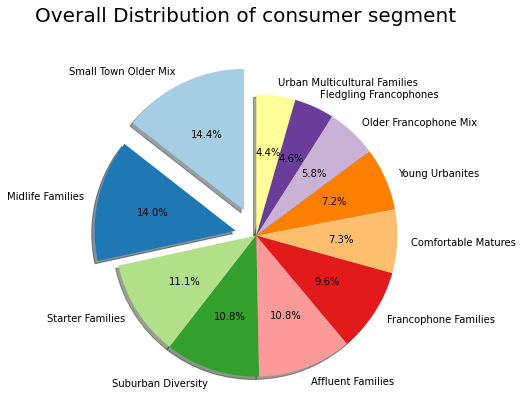

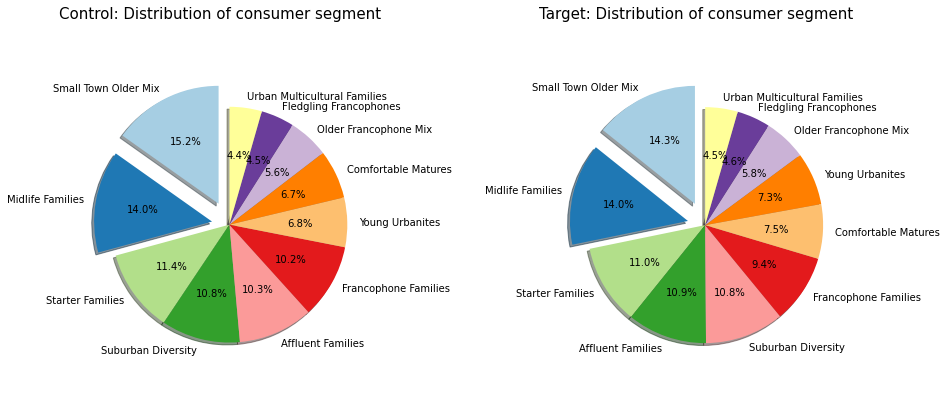

In [79]:
labels, val = zip(*base_df.CONSUMER_SEGMENT.value_counts().items())
control_labels, control_val = zip(*base_control.CONSUMER_SEGMENT.value_counts().items())
target_labels, target_val = zip(*base_target.CONSUMER_SEGMENT.value_counts().items())
explode = (0.2, 0.15, 0, 0, 0, 0, 0, 0, 0, 0, 0)

_, ax = plt.subplots(figsize=(6,6))
ax.set_title("Overall Distribution of consumer segment", fontsize=20)
ax.title.set_position([.5, 1.1])
ax.pie(val, labels=labels, explode=explode, autopct='%1.1f%%',
        colors=sns.color_palette("Paired"), shadow=True, startangle=90)
ax.axis('equal')
plt.show()

# subplots for specific targets
_, (ax1, ax2) = plt.subplots(1,2,figsize=(7,7))
ax1.set_title("Control: Distribution of consumer segment", fontsize=15)
ax1.title.set_position([.5, 1])
ax1.pie(control_val, labels=control_labels, explode=explode, autopct='%1.1f%%',
        colors=sns.color_palette("Paired"), shadow=True, startangle=90)
ax1.axis('equal')

ax2.set_title("Target: Distribution of consumer segment", fontsize=15)
ax2.title.set_position([.5, 1])
ax2.pie(target_val, labels=target_labels, explode=explode, autopct='%1.1f%%',
        colors=sns.color_palette("Paired"), shadow=True, startangle=90)
ax2.axis('equal')
plt.subplots_adjust(left=0, right=1.5,wspace=0.7,hspace=0)
plt.show()

# Apple vs. Non-apple comparison
distribution looks identical for both control & target

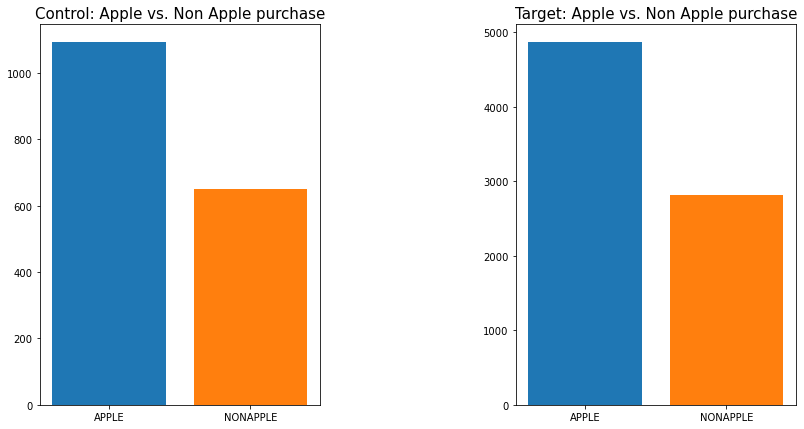

In [80]:
# apple purchase target vs. control
control_labels, control_val = zip(*aga_control['APPLE?'].value_counts().items())
target_labels, target_val = zip(*aga_target['APPLE?'].value_counts().items())

_, (ax1, ax2) = plt.subplots(1,2,figsize=(7,7))
ax1.set_title("Control: Apple vs. Non Apple purchase", fontsize=15)
ax1.title.set_position([.5, 1])
ax1.bar(control_labels, control_val, color=sns.color_palette())

ax2.set_title("Target: Apple vs. Non Apple purchase", fontsize=15)
ax2.title.set_position([.5, 1])
ax2.bar(target_labels, target_val, color=sns.color_palette())
plt.subplots_adjust(left=0, right=1.5,wspace=0.7,hspace=0)
plt.show()

In [68]:
# target: apple customer plan dist
aga_df[(aga_df['TARGET_CONTROL']=='TARGET') & (aga_df['APPLE?']=='APPLE')]['Plan'].value_counts()

SHARE    2591
ALL      1875
BASIC     399
Name: Plan, dtype: int64

In [70]:
# target: NON-apple customer plan dist
aga_df[(aga_df['TARGET_CONTROL']=='TARGET') & (aga_df['APPLE?']!='APPLE')]['Plan'].value_counts()

AP    2810
Name: Plan, dtype: int64

In [69]:
# control: apple customer plan dist
aga_df[(aga_df['TARGET_CONTROL']=='CONTROL') & (aga_df['APPLE?']=='APPLE')]['Plan'].value_counts()

SHARE    604
ALL      399
BASIC     89
Name: Plan, dtype: int64

In [71]:
# control: NON-apple customer plan dist
aga_df[(aga_df['TARGET_CONTROL']=='CONTROL') & (aga_df['APPLE?']!='APPLE')]['Plan'].value_counts()

AP    651
Name: Plan, dtype: int64

# provincial distribution

In [84]:
# overall
aga_df['Province'].value_counts()

ALL    3665
AP     2274
QC     1211
ON     1185
AB      818
MB      265
Name: Province, dtype: int64

In [120]:
# target
aga_target['Province'].value_counts()/3.74

ALL    794.652406
AP     501.336898
ON     260.962567
QC     258.288770
AB     177.540107
MB      59.358289
Name: Province, dtype: float64

In [85]:
# control
aga_control['Province'].value_counts()

ALL    693
AP     399
QC     245
ON     209
AB     154
MB      43
Name: Province, dtype: int64

In [122]:
aga_df

,CAMPAIGN_DT,NEW_SUB_NO,APPLE?,Plan,Province,SL/ML,TARGET_CONTROL,SUB_ORIG_CONTRACT_MTH,SOURCE_ACTIVATION_DT,CONTRACT_NEW_MTH,PRODUCT_CATEGORY,PRODUCT_DESC_EN,Channel,Subchannel,MODEL_GROUP_NM,MODEL_TYPE_NM,MODEL_CATEGORY_NM,MANUFACTURER_ENG_DESC
0,2020-03-07,16171483,NONAPPLE,AP,ALL,ML,TARGET,C4 - C6,2020-04-01,?,IoT,BUILT-IN CONN. CAR SHARE PLAN,Direct,Other Direct,?,?,?,?
1,2020-03-07,16468416,APPLE,ALL,AP,ML,TARGET,C7 - C12,2020-03-09,?,IoT,BUILT-IN CONN. CAR FLEX PLAN,Direct,Other Direct,?,?,?,?
2,2020-03-07,16289757,APPLE,ALL,AP,ML,TARGET,C7 - C12,2020-03-11,24,Smartphone,ADD SMART UNL CANADA 70 SHARE,Direct,CDS,Apple Iphone 7 32gb,Smartphones,Apple Iphone,APPLE
3,2020-03-07,16007412,NONAPPLE,AP,ALL,ML,TARGET,C13+,2020-03-11,24,Smartphone,SMARTPHONE PROMO 70,Direct,CDS,Samsung Galaxy S8,Smartphones,Android,SAMSUNG
4,2020-03-07,15970833,NONAPPLE,AP,ALL,SL,TARGET,C13+,2020-03-15,24,Smartphone,ADD SMART UNL CANADA 70 SHARE,Direct,CDS,Samsung Galaxy S9+,Smartphones,Android,SAMSUNG
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9413,2020-03-07,16381935,APPLE,ALL,AP,ML,CONTROL,C13+,2020-03-31,24,Mobile Internet,TABLET SHARE PLAN 24M,Retail,Wireless Wave,Huawei Technologies Mediapad T3 10,Tablets,Android Tablets,HUAWEI TECHNOLOGIES
9414,2020-03-07,16382025,APPLE,SHARE,QC,ML,TARGET,C4 - C6,2020-03-31,24,Mobile Internet,TABLET SHARE PLAN 24M,Dealers,Traditional,Huawei Technologies Mediapad T3 10,Tablets,Android Tablets,HUAWEI TECHNOLOGIES
9415,2020-03-07,16382998,APPLE,SHARE,ON,ML,TARGET,C7 - C12,2020-03-31,24,Mobile Internet,TABLET SHARE PLAN 24M,Retail,Wireless Wave,Huawei Technologies Mediapad T3 10,Tablets,Android Tablets,HUAWEI TECHNOLOGIES
9416,2020-03-07,16383190,APPLE,BASIC,ALL,ML,TARGET,C13+,2020-03-31,24,Smartphone,ADD PREMPLUS UNL CANADA 90 SHR,Retail,Wireless Wave,Apple Iphone X 64gb,Smartphones,Apple Iphone,APPLE
